In [40]:
import pandas as pd
import datetime
from VolatilitySurface import VolatilitySurface
from pandas.tseries.offsets import BDay

In [41]:
previous_date = (datetime.datetime.today() - BDay(1)).date()
r = 0.04 
d = 0.01

In [42]:
market_date, ticker= previous_date, 'AAPL'
appl_vol_surface_from_calls = VolatilitySurface(market_date=market_date, ticker=ticker, mode='Calls', r=r, d =d)
appl_vol_surface_from_puts = VolatilitySurface(market_date=market_date, ticker=ticker, mode='Puts', r=r, d =d)

c:\Users\moham\OneDrive\Bureau\asset_pricing_project\import_data\import_data.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return self.ticker.history(start = start_date, end = end_date)['Close'][0]
c:\Users\moham\OneDrive\Bureau\asset_pricing_project\import_data\import_data.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return self.ticker.history(start = start_date, end = end_date)['Close'][0]
c:\Users\moham\OneDrive\Bureau\asset_pricing_project\import_data\import_data.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treat

<Axes: xlabel='strike'>

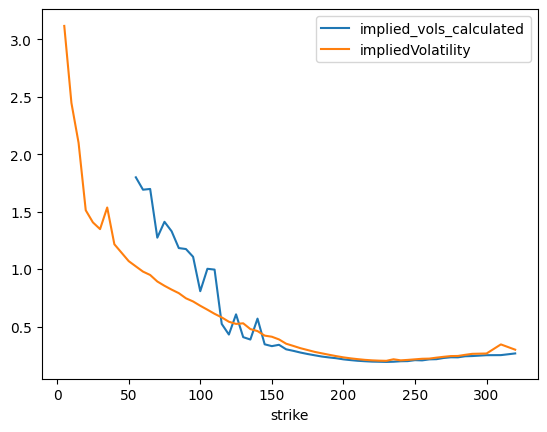

In [44]:
# comparaison contre yahoo finance
# On nas pas eactement la meme surface can on ne sait pas les conventiosn que yf utilise sur les dividendes et taux d'interet
df_calls = appl_vol_surface_from_calls.DataWithImpliedVolsCalculated()
# df_calls[df_calls.Expiration_Date == datetime.date(2026,6,18)].plot(x = 'strike', y=['implied_vols_calculated', 'impliedVolatility'])
df_calls[df_calls.Expiration_Date == datetime.date(2024, 6, 21)].plot(x = 'strike', y=['implied_vols_calculated', 'impliedVolatility'])



In [47]:
vol_map = appl_vol_surface_from_calls.VolMap()
vol_k = appl_vol_surface_from_calls.VolMapDfNoNan()
appl_vol_surface_from_calls.search_closest_two_strikes(120)
appl_vol_surface_from_calls.search_closest_two_expiries(2)

(1.9643835616438357, 2.3835616438356166)

<Axes: title={'center': 'Interpolated_Vol_from_Calls'}, xlabel='K'>

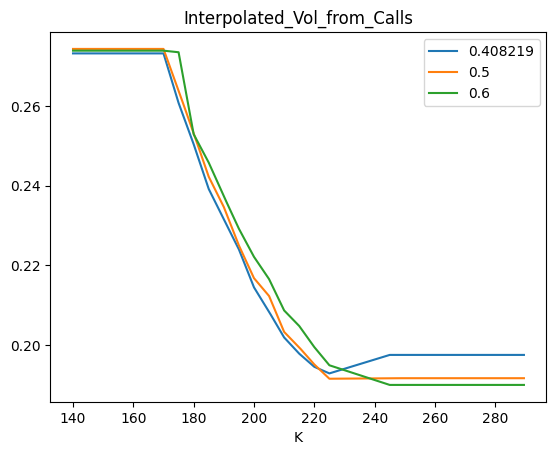

In [48]:
list_dicts_sigmas = []
for k_i in range(300):
    K = 140 + k_i*0.5
    dic_k = {}
    dic_k['K'] = K
    for T in [0.1, 0.408219, 0.5, 0.6, 1, 1.5, 2, 2.4, 3, 4]:
        dic_k[T] =  appl_vol_surface_from_calls.InterpolatedVol(K,T)
    list_dicts_sigmas +=[dic_k]
    
df_vols = pd.DataFrame(list_dicts_sigmas)
df_vols.plot(x='K', y = [0.408219	, 0.5, 0.6], title = 'Interpolated_Vol_from_Calls')

<Axes: title={'center': 'Interpolated_Vol_from_Puts'}, xlabel='K'>

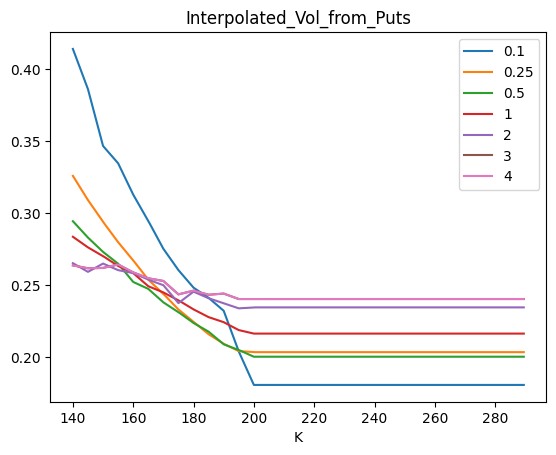

In [50]:
list_dicts_sigmas = []
for k_i in range(300):
    K = 140 + k_i*0.5
    dic_k = {}
    dic_k['K'] = K
    for T in [0.1, 0.25, 0.5, 1, 2, 3, 4]:
        dic_k[T] =  appl_vol_surface_from_puts.InterpolatedVol(K,T)
    list_dicts_sigmas +=[dic_k]
    
df_vols = pd.DataFrame(list_dicts_sigmas)
df_vols.plot(x='K', y = [0.1, 0.25, 0.5, 1, 2, 3, 4], title = 'Interpolated_Vol_from_Puts')

In [54]:
from VanillaPricerWithHeston import VanillaPricerWithHestonCalibrated
pricer_heston = VanillaPricerWithHestonCalibrated(market_date, 'AAPL', 'Calls', r, d)

c:\Users\moham\OneDrive\Bureau\asset_pricing_project\import_data\import_data.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return self.ticker.history(start = start_date, end = end_date)['Close'][0]


<Axes: title={'center': 'Interpolated_Vol_from_Calls'}, xlabel='K'>

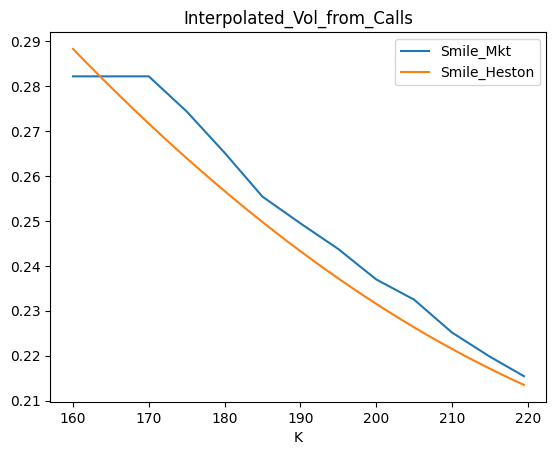

In [56]:
#Nous remarquons que le smile de Heston se rapproche du smile du marché
list_dicts_sigmas = []
T=1
for k_i in range(120):
    K = 160 + k_i*0.5
    dic_k = {}
    dic_k['K'] = K
    dic_k['Smile_Mkt'] =  appl_vol_surface_from_calls.InterpolatedVol(K,T)
    dic_k['Smile_Heston'] = pricer_heston.ImpliedVol(K,T)
    list_dicts_sigmas +=[dic_k]
    
df_vols = pd.DataFrame(list_dicts_sigmas)
df_vols.plot(x='K', y = ['Smile_Mkt', 'Smile_Heston'], title = 'Interpolated_Vol_from_Calls')